# Lab 2: Data Preparation

While exploring the bank data set, we discovered a few issues.

- There are missing values in the following columns: age, job, education, contact
- When correlating job and balance, there are some extreme values for the attribute balance. For example, the most extreme balance belongs to a retired person with secondary education and housemaid earns almost the same as a manager.
- Most of the clients are between late 20s and 40s. There are few people that are older.
- Most of the clients have been contacted once during the campaign. The attribute campaign has some extreme values.

## A. Import Python Modules and Dataset 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r"/Users/steffipoliwoda/Desktop/bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


I will check for missing values.

In [2]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

I will make a copy of the data set.

In [3]:
df_original = df

## B. Process and Encode the Categorical Features

I can't drop any column, because they all contain useful information.

### Encode Ordinal Categorical Attributes

Almost all categorical columns (job, marital, default, housing, loan, cellular, failure, and subscribed) are nominal. There is only education which is ordinal under the categorical columns.

In [4]:
# Create a mapper

scale_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df['education'] = df['education'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


### One-Hot Encode All Other Categorical Attributes

In [5]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['poutcome','contact','job','education'],
                        dummy_na=True,
                        drop_first=True)
df.tail()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,education_2.0,education_3.0,education_nan
1995,20.0,single,no,2785,no,no,16,sep,327,2,...,0,0,0,1,0,0,0,0,0,1
1996,28.0,single,no,127,no,no,16,sep,1334,2,...,0,0,0,0,0,0,0,1,0,0
1997,81.0,married,no,1154,no,no,17,sep,231,1,...,1,0,0,0,0,0,0,0,0,0
1998,46.0,married,no,4343,yes,no,20,sep,185,1,...,0,0,1,0,0,0,0,0,0,0
1999,40.0,married,no,6403,no,no,22,sep,208,2,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,poutcome_other,poutcome_success,poutcome_nan,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
0,32.0,392,1,957,2,131,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,688,1,233,2,133,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,1035,1,126,2,239,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,398,1,274,1,238,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1004,1,479,1,307,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## C. Treatment of Missing Values in Numerical Columns

In [7]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                  12
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
poutcome_other        0
poutcome_success      0
poutcome_nan          0
contact_telephone     0
contact_nan           0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
job_nan               0
education_2.0         0
education_3.0         0
education_nan         0
marital_married       0
marital_single        0
default_yes           0
housing_yes           0
loan_yes              0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct             0
month_sep       

### Impute Missing Values

I will replace the missing age values with the mean.

In [8]:
df['age'].fillna(df['age'].mean(), inplace=True)

I will look at the box plots to see if a trend exists:

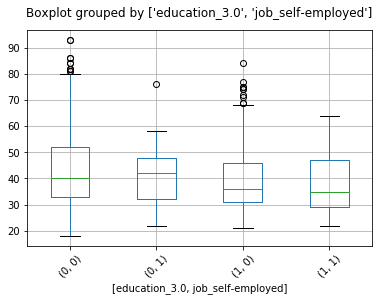

In [9]:
df.boxplot(column='age', by=['education_3.0','job_self-employed'], rot=45)
plt.title("")
plt.show()

There are some variations in the median of the age for each group. These medians can be used for imputing the missing values in each group. 

I will create a pivot table which contains the median values for all groups.

In [10]:
ptable = df.pivot_table(values='age', 
                        index='job_self-employed',
                        columns='education_3.0',  
                        aggfunc=np.median)
ptable

education_3.0,0,1
job_self-employed,,
0,40.0,36.0
1,42.0,35.0


In [11]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job_self-employed'], x['education_3.0']]

## Outliers

Last week we observed that balance contains some extreme values. I will look at the box plot of balance to verify that it has outliers.

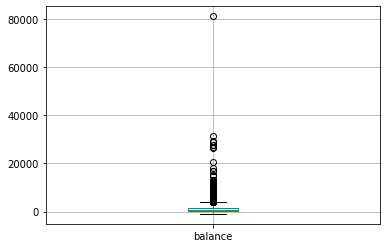

In [12]:
df.boxplot(column='balance')
plt.show()

I will look at the histogram after I have rescaled it.

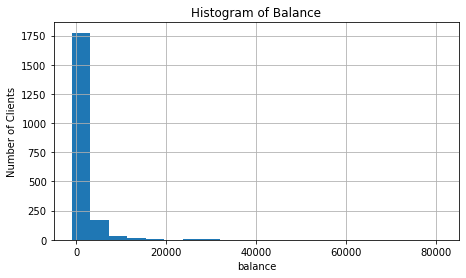

In [13]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

plt.show()

The histogram is skewed. I will find the minimum values in this column.

In [14]:
df[['balance']].min()

balance   -980
dtype: int64

In [18]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.85)

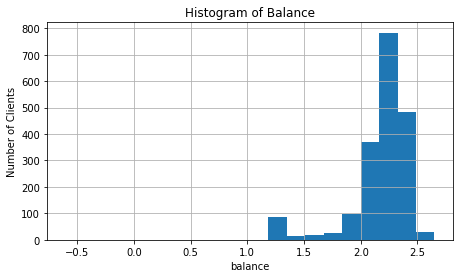

In [19]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

plt.show()

# Saving the Dataset

In [17]:
df.to_csv('bank_prepared.csv')